# Long sequence study, Anders
In this notebook we test two ideas.
* Make a very long sequence and test how recall varies for testing in different parts of the chain.
* Study how recall varies with sequence length

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '203c131a311ade49db867710cfd9efa04e8fdf69'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load the libraries

In [3]:
from network import Protocol, BCPNNFast, NetworkManager
from plotting_functions import plot_winning_pattern
from analysis_functions import calculate_recall_success
from analysis_functions import calculate_timingsw

## A simple example

In [4]:
# Network parameters
minicolumns = 50
hypercolums = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
training_time = 0.100
inter_pulse_interval = 0.0
epochs = 3

# Build the network, manager and protocol
nn = BCPNNFast(hypercolumns=hypercolums, minicolumns=minicolumns)
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
simple_protocol = Protocol()
simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_time, 
                                inter_sequence_interval=1.0, epochs=epochs)

In [5]:
# Train
manager.run_network_protocol(protocol=simple_protocol, verbose=False)

In [6]:
# Recall
T_recall = 25.0
T_cue = training_time
manager.run_network_recall(T_recall=T_recall, T_cue=0.100, I_cue=0)

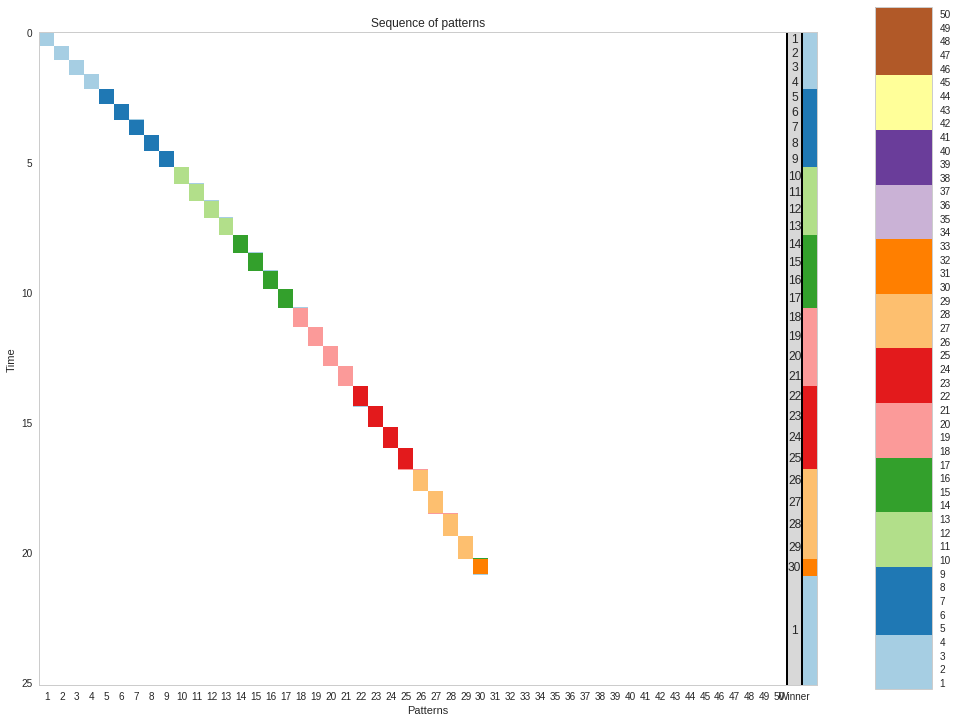

In [7]:
# Plot
plot_winning_pattern(manager);

In [8]:
timings = calculate_timings(manager=manager, remove=0.010)[:-1]

pattern_number = [time[0] for time in timings]
recall_times = [time[1] for time in timings]

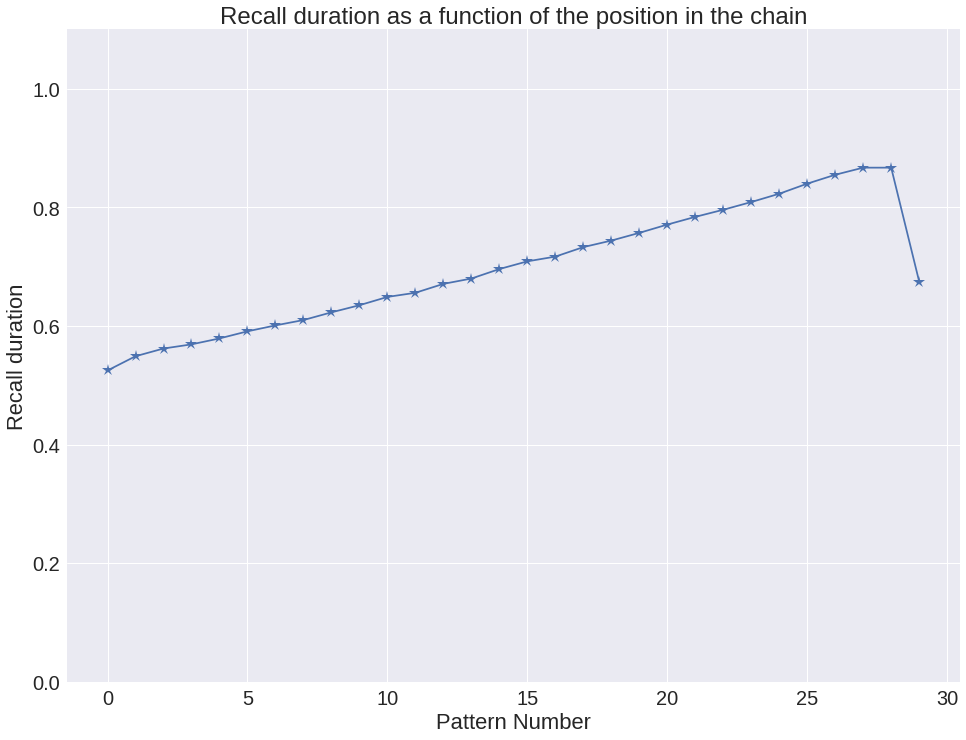

In [9]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(pattern_number, recall_times, '*-', markersize=12)

ax.set_title('Recall duration as a function of the position in the chain')
ax.set_xlabel('Pattern Number')
ax.set_ylabel('Recall duration')
ax.set_ylim([0, 1.1]);

## Recall success as a function of different parts of the chain

In [10]:
# Network parameters
minicolumns = 80
hypercolums = 4
number_of_patterns = 60
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
training_time = 0.100
inter_pulse_interval = 0.0
epochs = 3

# Build the network, manager and protocol
nn = BCPNNFast(hypercolumns=hypercolums, minicolumns=minicolumns)
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
simple_protocol = Protocol()
simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_time, 
                                inter_sequence_interval=1.0, epochs=epochs)

In [11]:
# Train
manager.run_network_protocol(protocol=simple_protocol, verbose=False)

In [12]:
# Recall
successes = []
T_cue = training_time
I_cue_range = np.arange(0, number_of_patterns - 1, 5)
for I_cue in I_cue_range:

    recall_patterns_indexes = [i for i in range(I_cue, number_of_patterns)]
    T_recall = len(recall_patterns_indexes) * 9 * training_time
    
    print(I_cue)
    print(T_recall)
   
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=0.100, I_cue=I_cue, n=10,
                                         patterns_indexes=recall_patterns_indexes)
    print(success)
    timings = calculate_timings(manager=manager, remove=0.010)
    pprint.pprint(timings)
    successes.append(success)


0
54.0
100.0
[(0, 0.32300000000000001, 0.0, 0.32200000000000001),
 (1, 0.32700000000000001, 0.32200000000000001, 0.64800000000000002),
 (2, 0.33800000000000002, 0.64800000000000002, 0.98499999999999999),
 (3, 0.34300000000000003, 0.98499999999999999, 1.327),
 (4, 0.35100000000000003, 1.327, 1.677),
 (5, 0.35499999999999998, 1.677, 2.0310000000000001),
 (6, 0.35599999999999998, 2.0310000000000001, 2.3860000000000001),
 (7, 0.36499999999999999, 2.3860000000000001, 2.75),
 (8, 0.371, 2.75, 3.1200000000000001),
 (9, 0.377, 3.1200000000000001, 3.496),
 (10, 0.38300000000000001, 3.496, 3.8780000000000001),
 (11, 0.38900000000000001, 3.8780000000000001, 4.266),
 (12, 0.39500000000000002, 4.266, 4.6600000000000001),
 (13, 0.40200000000000002, 4.6600000000000001, 5.0609999999999999),
 (14, 0.40900000000000003, 5.0609999999999999, 5.4690000000000003),
 (15, 0.41500000000000004, 5.4690000000000003, 5.883),
 (16, 0.42199999999999999, 5.883, 6.3040000000000003),
 (17, 0.42899999999999999, 6.3040000

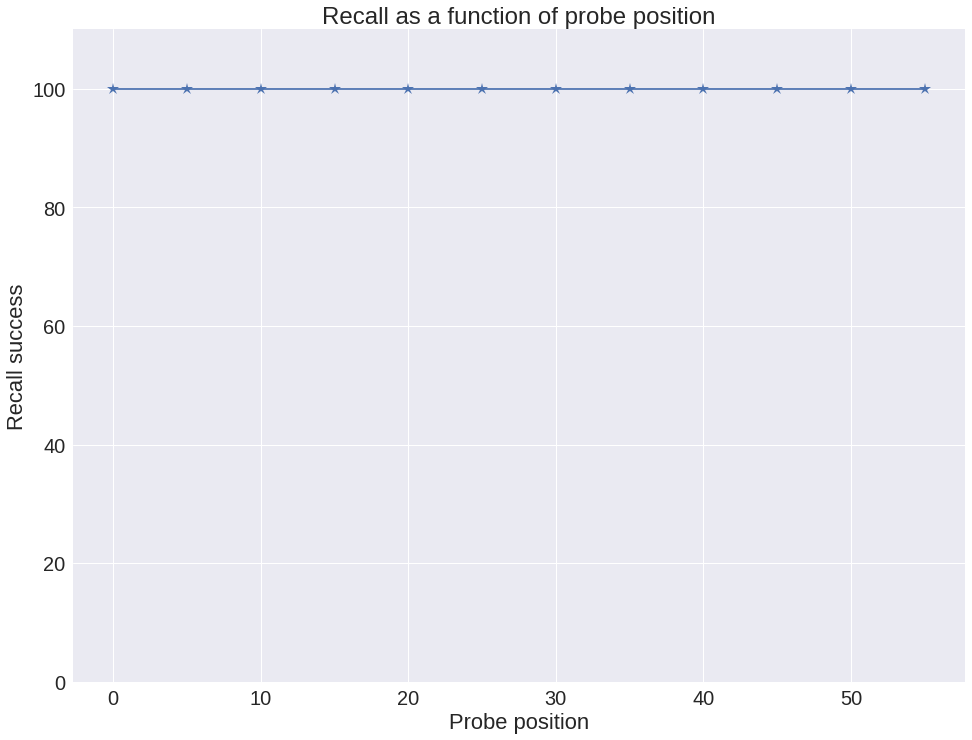

In [14]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(I_cue_range, successes, '*-', markersize=13)

ax.set_title('Recall as a function of probe position')
ax.set_xlabel('Probe position')
ax.set_ylabel('Recall success')
ax.set_ylim([0, 110]);

# Success as a length of the chain

In [6]:
# Network parameters
minicolumns = 100
hypercolums = 4

# Training parameters
dt = 0.001
training_time = 0.100
inter_pulse_interval = 0.0
epochs = 3

# Build the network, manager and protocol
nn = BCPNNFast(hypercolumns=hypercolums, minicolumns=minicolumns)
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])

In [15]:
# Train
max_number_of_patterns = 60
number_of_patterns_range = np.arange(10, max_number_of_patterns, 5)
successes = []
for number_of_patterns in number_of_patterns_range:
    print(number_of_patterns)
    patterns_indexes = [i for i in range(number_of_patterns)]
    simple_protocol = Protocol()
    simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_time, 
                                inter_sequence_interval=1.0, epochs=epochs)
    manager.run_network_protocol(protocol=simple_protocol, verbose=False)

    # Recall
    T_cue = training_time
    T_recall = training_time * 9 * number_of_patterns
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=0, T_cue=T_cue, n=10, patterns_indexes=patterns_indexes)
    successes.append(success)

40
45
50
55


(0, 110)

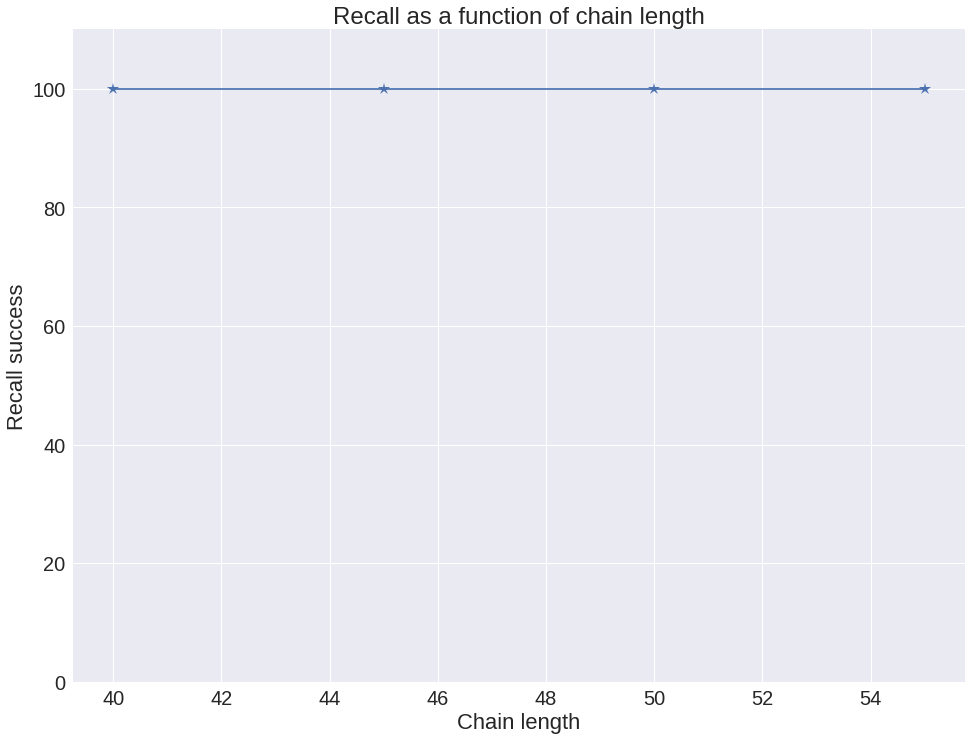

In [17]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(number_of_patterns_range, successes, '*-', markersize=13)

ax.set_title('Recall as a function of chain length')
ax.set_xlabel('Chain length')
ax.set_ylabel('Recall success')
ax.set_ylim([0, 110])

#### Git reload

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])